<a href="https://colab.research.google.com/github/Yogesh0903/Predictive-Modelling-Using-Social-Profile-in-Online-P2P-Lending-Platform/blob/main/Predictive_Modelling_Using_Social_Profile_in_Online_P2P_Lending_Platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

The following code imports essential libraries for data analysis and machine learning tasks:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import seaborn as sb
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [3]:
#Importing Dataset
data = pd.read_csv("https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv")

In [4]:
#Checking the head observations
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
#Checking shape of the dataset
data.shape

(113937, 81)

In [6]:
#Checking info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
pd.set_option('display.max_rows', 500)

In [8]:
data.isnull().sum().sort_values(ascending=False)

GroupKey                               100596
LoanFirstDefaultedCycleNumber           96985
ScorexChangeAtTimeOfListing             95009
ProsperPrincipalOutstanding             91852
ProsperPrincipalBorrowed                91852
ProsperPaymentsOneMonthPlusLate         91852
ProsperPaymentsLessThanOneMonthLate     91852
OnTimeProsperPayments                   91852
TotalProsperLoans                       91852
TotalProsperPaymentsBilled              91852
CreditGrade                             84984
ClosedDate                              58848
ProsperRating (Alpha)                   29084
ProsperScore                            29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
EstimatedLoss                           29084
EstimatedEffectiveYield                 29084
DebtToIncomeRatio                        8554
EmploymentStatusDuration                 7625
AmountDelinquent                         7622
CurrentCreditLines                

In [9]:
#Checking if there any wrong entries like symbols(-,?,#,*,)etc.
for col in data.columns:
    print('{} : {}'.format(col,data[col].unique()))

ListingKey : ['1021339766868145413AB3B' '10273602499503308B223C1'
 '0EE9337825851032864889A' ... 'E6E13596170052029692BB1'
 'E6EB3531504622671970D9E' 'E6ED3600409833199F711B7']
ListingNumber : [ 193129 1209647   81716 ... 1069178  539056 1140093]
ListingCreationDate : ['2007-08-26 19:09:29.263000000' '2014-02-27 08:28:07.900000000'
 '2007-01-05 15:00:47.090000000' ... '2013-12-13 05:49:12.703000000'
 '2011-11-14 13:18:26.597000000' '2014-01-15 09:27:37.657000000']
CreditGrade : ['C' nan 'HR' 'AA' 'D' 'B' 'E' 'A' 'NC']
Term : [36 60 12]
LoanStatus : ['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']
ClosedDate : ['2009-08-14 00:00:00' nan '2009-12-17 00:00:00' ... '2006-10-25 00:00:00'
 '2005-12-08 00:00:00' '2005-11-25 00:00:00']
BorrowerAPR : [0.16516 0.12016 0.28269 ... 0.22674 0.3477  0.19543]
BorrowerRat

In [10]:
# Checking if there any Duplicates data entry in loan data
data.duplicated().sum()

0

In [11]:
#checking the captalization
data['LoanStatus'].value_counts(dropna=False)

LoanStatus
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: count, dtype: int64

# Data Cleaning

## Handling Missing Values

In [12]:
#Splitting dataset into Catogerical and Continues Variables
categorical_data=data.select_dtypes("object")
categorical_data

,ListingKey,ListingCreationDate,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,Completed,2009-08-14 00:00:00,NaN,CO,Other,Self-employed,NaN,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,Current,NaN,A,CO,Professional,Employed,NaN,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,Completed,2009-12-17 00:00:00,NaN,GA,Other,Not available,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,Current,NaN,A,GA,Skilled Labor,Employed,NaN,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,Current,NaN,D,MN,Executive,Employed,NaN,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,2013-04-14 05:55:02.663000000,NaN,Current,NaN,C,IL,Food Service Management,Employed,NaN,2013-04-14 05:54:58,1997-09-01 00:00:00,"$50,000-74,999",9BD7367919051593140DB62,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15
113933,E6DB353036033497292EE43,2011-11-03 20:42:55.333000000,NaN,FinalPaymentInProgress,NaN,A,PA,Professional,Employed,NaN,2011-11-03 20:42:53,1992-01-17 00:00:00,"$75,000-99,999",62D93634569816897D5A276,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC
113934,E6E13596170052029692BB1,2013-12-13 05:49:12.703000000,NaN,Current,NaN,D,TX,Other,Employed,NaN,2013-12-13 05:49:15,2002-02-25 00:00:00,"$25,000-49,999",DD1A370200396006300ACA0,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5
113935,E6EB3531504622671970D9E,2011-11-14 13:18:26.597000000,NaN,Completed,2013-08-13 00:00:00,C,GA,Food Service,Full-time,NaN,2011-11-14 13:18:24,1993-12-01 00:00:00,"$25,000-49,999",589536350469116027ED11B,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8


In [13]:
continuous_data=data.select_dtypes("number")
continuous_data

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


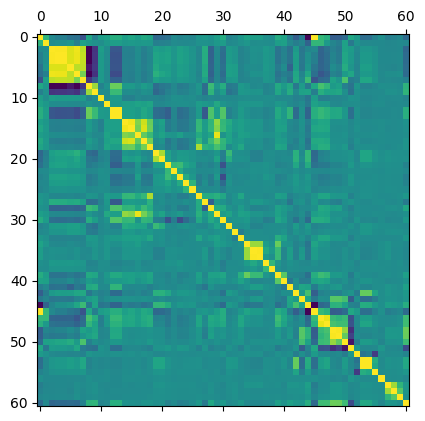

In [14]:
plt.matshow(continuous_data.corr())
plt.show()

<Axes: >

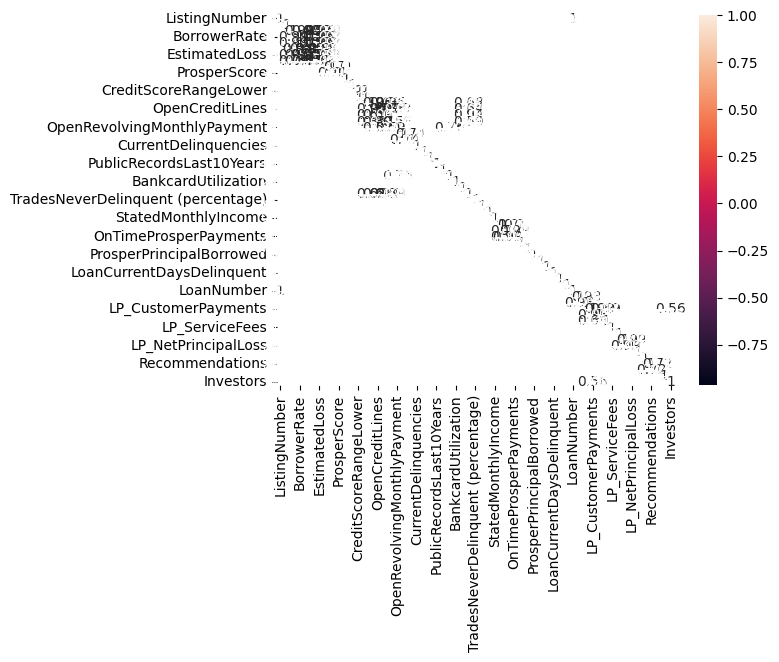

In [15]:
sns.heatmap(continuous_data.corr(),annot = True, linewidths = 10)

In [16]:
#Checking is there any missing values in Categorical variables
categorical_data.isna().sum()

ListingKey                      0
ListingCreationDate             0
CreditGrade                 84984
LoanStatus                      0
ClosedDate                  58848
ProsperRating (Alpha)       29084
BorrowerState                5515
Occupation                   3588
EmploymentStatus             2255
GroupKey                   100596
DateCreditPulled                0
FirstRecordedCreditLine       697
IncomeRange                     0
LoanKey                         0
LoanOriginationDate             0
LoanOriginationQuarter          0
MemberKey                       0
dtype: int64

In [17]:
#Reaplacing null values with Mode
categorical_data=categorical_data.fillna(categorical_data.mode().iloc[0])
categorical_data

,ListingKey,ListingCreationDate,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,Completed,2009-08-14 00:00:00,C,CO,Other,Self-employed,783C3371218786870A73D20,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,C,Current,2014-03-04 00:00:00,A,CO,Professional,Employed,783C3371218786870A73D20,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,Completed,2009-12-17 00:00:00,C,GA,Other,Not available,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,C,Current,2014-03-04 00:00:00,A,GA,Skilled Labor,Employed,783C3371218786870A73D20,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,C,Current,2014-03-04 00:00:00,D,MN,Executive,Employed,783C3371218786870A73D20,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,2013-04-14 05:55:02.663000000,C,Current,2014-03-04 00:00:00,C,IL,Food Service Management,Employed,783C3371218786870A73D20,2013-04-14 05:54:58,1997-09-01 00:00:00,"$50,000-74,999",9BD7367919051593140DB62,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15
113933,E6DB353036033497292EE43,2011-11-03 20:42:55.333000000,C,FinalPaymentInProgress,2014-03-04 00:00:00,A,PA,Professional,Employed,783C3371218786870A73D20,2011-11-03 20:42:53,1992-01-17 00:00:00,"$75,000-99,999",62D93634569816897D5A276,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC
113934,E6E13596170052029692BB1,2013-12-13 05:49:12.703000000,C,Current,2014-03-04 00:00:00,D,TX,Other,Employed,783C3371218786870A73D20,2013-12-13 05:49:15,2002-02-25 00:00:00,"$25,000-49,999",DD1A370200396006300ACA0,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5
113935,E6EB3531504622671970D9E,2011-11-14 13:18:26.597000000,C,Completed,2013-08-13 00:00:00,C,GA,Food Service,Full-time,783C3371218786870A73D20,2011-11-14 13:18:24,1993-12-01 00:00:00,"$25,000-49,999",589536350469116027ED11B,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8


In [18]:
categorical_data.isna().sum()

ListingKey                 0
ListingCreationDate        0
CreditGrade                0
LoanStatus                 0
ClosedDate                 0
ProsperRating (Alpha)      0
BorrowerState              0
Occupation                 0
EmploymentStatus           0
GroupKey                   0
DateCreditPulled           0
FirstRecordedCreditLine    0
IncomeRange                0
LoanKey                    0
LoanOriginationDate        0
LoanOriginationQuarter     0
MemberKey                  0
dtype: int64

In [19]:
#Reaplacing null values with Median
continuous_data=continuous_data.fillna(continuous_data.median().iloc[0])
continuous_data

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,0.16516,0.1580,0.1380,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,0.28269,0.2750,0.2400,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [20]:
boolean=data.select_dtypes("bool")
boolean

,IsBorrowerHomeowner,CurrentlyInGroup,IncomeVerifiable
0,True,True,True
1,False,False,True
2,False,True,True
3,True,False,True
4,True,False,True
...,...,...,...
113932,True,False,True
113933,True,False,True
113934,True,False,True
113935,True,False,True


In [21]:
boolean.isna().sum()

IsBorrowerHomeowner    0
CurrentlyInGroup       0
IncomeVerifiable       0
dtype: int64

In [22]:
data1 = pd.concat([continuous_data, categorical_data, boolean], axis=1, join='inner')
display(data1)

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey,IsBorrowerHomeowner,CurrentlyInGroup,IncomeVerifiable
0,193129,36,0.16516,0.1580,0.1380,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,True,True,True
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,False,False,True
2,81716,36,0.28269,0.2750,0.2400,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,False,True,True
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,True,False,True
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,2013-04-14 05:54:58,1997-09-01 00:00:00,"$50,000-74,999",9BD7367919051593140DB62,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15,True,False,True
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,2011-11-03 20:42:53,1992-01-17 00:00:00,"$75,000-99,999",62D93634569816897D5A276,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC,True,False,True
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,2013-12-13 05:49:15,2002-02-25 00:00:00,"$25,000-49,999",DD1A370200396006300ACA0,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5,True,False,True
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,2011-11-14 13:18:24,1993-12-01 00:00:00,"$25,000-49,999",589536350469116027ED11B,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8,True,False,True


In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingNumber                        113937 non-null  int64  
 1   Term                                 113937 non-null  int64  
 2   BorrowerAPR                          113937 non-null  float64
 3   BorrowerRate                         113937 non-null  float64
 4   LenderYield                          113937 non-null  float64
 5   EstimatedEffectiveYield              113937 non-null  float64
 6   EstimatedLoss                        113937 non-null  float64
 7   EstimatedReturn                      113937 non-null  float64
 8   ProsperRating (numeric)              113937 non-null  float64
 9   ProsperScore                         113937 non-null  float64
 10  ListingCategory (numeric)            113937 non-null  int64  
 11  EmploymentSta

In [24]:
data1.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,131.992040,0.192764,0.182701,153299.866132,153299.800330,153299.812069,153302.773269,153304.171753,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,8894.955388,0.074818,0.074516,261848.286590,261848.325114,261848.318241,261846.584588,261845.765840,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.132600,0.054900,0.080220,3.000000,5.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209790,0.184000,0.173000,0.195710,0.099000,0.109300,5.000000,7.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283860,0.250000,0.240000,600554.000000,600554.000000,600554.000000,600554.000000,600554.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,600554.000000,0.497500,0.492500,600554.000000,600554.000000,600554.000000,600554.000000,600554.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [25]:
data1.isna().sum()

ListingNumber                          0
Term                                   0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperScore                           0
ListingCategory (numeric)              0
EmploymentStatusDuration               0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
CurrentCreditLines                     0
OpenCreditLines                        0
TotalCreditLinespast7years             0
OpenRevolvingAccounts                  0
OpenRevolvingMonthlyPayment            0
InquiriesLast6Months                   0
TotalInquiries                         0
CurrentDelinquencies                   0
AmountDelinquent                       0
DelinquenciesLast7Years                0
PublicRecordsLas

In [26]:
data1.isnull().sum()

ListingNumber                          0
Term                                   0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperScore                           0
ListingCategory (numeric)              0
EmploymentStatusDuration               0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
CurrentCreditLines                     0
OpenCreditLines                        0
TotalCreditLinespast7years             0
OpenRevolvingAccounts                  0
OpenRevolvingMonthlyPayment            0
InquiriesLast6Months                   0
TotalInquiries                         0
CurrentDelinquencies                   0
AmountDelinquent                       0
DelinquenciesLast7Years                0
PublicRecordsLas

<Axes: >

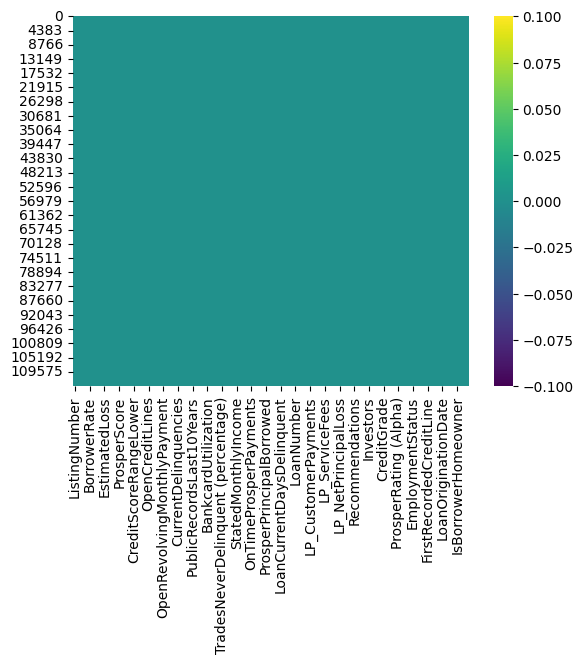

In [27]:
# Visualizing the missing values
sns.heatmap(data1.isnull(),cbar=True,cmap='viridis')

In [28]:
print(data1.isnull().values.sum())

0


Now, dataset has no missing values.

## Dealing with Duplicates

In [29]:
# Number of Duplicates
num_duplicates = data1.duplicated().sum()

print(f"Number of duplicates in 'data1': {num_duplicates}")

Number of duplicates in 'data1': 0


In [30]:
data1 = data1.drop_duplicates()

In [31]:
#### Dropping column
data1.drop(['ListingCreationDate','LoanOriginationDate','GroupKey','CreditGrade','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)',
         'TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ListingKey'], axis =1, inplace = True)
data1.head()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,...,EmploymentStatus,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey,IsBorrowerHomeowner,CurrentlyInGroup,IncomeVerifiable
0,193129,36,0.16516,0.1580,0.1380,600554.0,0,2.0,640.0,659.0,...,Self-employed,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,Q3 2007,1F3E3376408759268057EDA,True,True,True
1,1209647,36,0.12016,0.0920,0.0820,7.0,2,44.0,680.0,699.0,...,Employed,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,Q1 2014,1D13370546739025387B2F4,False,False,True
2,81716,36,0.28269,0.2750,0.2400,600554.0,0,600554.0,480.0,499.0,...,Not available,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,Q1 2007,5F7033715035555618FA612,False,True,True
3,658116,36,0.12528,0.0974,0.0874,9.0,16,113.0,800.0,819.0,...,Employed,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,Q4 2012,9ADE356069835475068C6D2,True,False,True
4,909464,36,0.24614,0.2085,0.1985,4.0,2,44.0,680.0,699.0,...,Employed,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,Q3 2013,36CE356043264555721F06C,True,False,True


In [32]:
data1.shape

(113937, 65)

# Data Encoding

In [33]:
cols = ['ClosedDate','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine','DateCreditPulled','IncomeRange','LoanKey','LoanOriginationQuarter',
       'MemberKey']

# Encode labels of multiple columns at once

data1[cols] = data1[cols].apply(LabelEncoder().fit_transform)

# Print head

data1.head()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,...,EmploymentStatus,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey,IsBorrowerHomeowner,CurrentlyInGroup,IncomeVerifiable
0,193129,36,0.16516,0.1580,0.1380,600554.0,0,2.0,640.0,659.0,...,7,14346,8637,3,100336,17,11070,True,True,True
1,1209647,36,0.12016,0.0920,0.0820,7.0,2,44.0,680.0,699.0,...,0,111882,6615,4,69836,7,10301,False,False,True
2,81716,36,0.28269,0.2750,0.2400,600554.0,0,600554.0,480.0,499.0,...,2,6445,8925,6,46302,1,33780,False,True,True
3,658116,36,0.12528,0.0974,0.0874,9.0,16,113.0,800.0,819.0,...,0,64723,2245,3,70775,31,54938,True,False,True
4,909464,36,0.24614,0.2085,0.1985,4.0,2,44.0,680.0,699.0,...,0,85856,9496,2,71386,23,19464,True,False,True


In [34]:
# converting to binary data
data_one = pd.get_dummies(data1["LoanStatus"])
print(data_one)

        Cancelled  Chargedoff  Completed  Current  Defaulted  \
0           False       False       True    False      False   
1           False       False      False     True      False   
2           False       False       True    False      False   
3           False       False      False     True      False   
4           False       False      False     True      False   
...           ...         ...        ...      ...        ...   
113932      False       False      False     True      False   
113933      False       False      False    False      False   
113934      False       False      False     True      False   
113935      False       False       True    False      False   
113936      False       False      False     True      False   

        FinalPaymentInProgress  Past Due (1-15 days)  Past Due (16-30 days)  \
0                        False                 False                  False   
1                        False                 False                  Fal

# Data Labelling

In [35]:
# Displaying Data 1
data_two = pd.concat((data_one, data1), axis=1)
data_two = data_two.drop(["LoanStatus"], axis=1)
data_two = data_two.drop(["Cancelled","Chargedoff","Current","Defaulted","FinalPaymentInProgress","FinalPaymentInProgress","Past Due (1-15 days)","Past Due (16-30 days)",
                              "Past Due (31-60 days)","Past Due (61-90 days)","Past Due (91-120 days)","Past Due (91-120 days)","Past Due (>120 days)"], axis=1)
Data= data_two.rename(columns={"Completed": "LoanStatus"})
print(Data)


        LoanStatus  ListingNumber  Term  BorrowerAPR  BorrowerRate  \
0             True         193129    36      0.16516        0.1580   
1            False        1209647    36      0.12016        0.0920   
2             True          81716    36      0.28269        0.2750   
3            False         658116    36      0.12528        0.0974   
4            False         909464    36      0.24614        0.2085   
...            ...            ...   ...          ...           ...   
113932       False         753087    36      0.22354        0.1864   
113933       False         537216    36      0.13220        0.1110   
113934       False        1069178    60      0.23984        0.2150   
113935        True         539056    60      0.28408        0.2605   
113936       False        1140093    36      0.13189        0.1039   

        LenderYield  ProsperScore  ListingCategory (numeric)  \
0            0.1380      600554.0                          0   
1            0.0820           7

In [36]:
Data

,LoanStatus,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,...,EmploymentStatus,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey,IsBorrowerHomeowner,CurrentlyInGroup,IncomeVerifiable
0,True,193129,36,0.16516,0.1580,0.1380,600554.0,0,2.0,640.0,...,7,14346,8637,3,100336,17,11070,True,True,True
1,False,1209647,36,0.12016,0.0920,0.0820,7.0,2,44.0,680.0,...,0,111882,6615,4,69836,7,10301,False,False,True
2,True,81716,36,0.28269,0.2750,0.2400,600554.0,0,600554.0,480.0,...,2,6445,8925,6,46302,1,33780,False,True,True
3,False,658116,36,0.12528,0.0974,0.0874,9.0,16,113.0,800.0,...,0,64723,2245,3,70775,31,54938,True,False,True
4,False,909464,36,0.24614,0.2085,0.1985,4.0,2,44.0,680.0,...,0,85856,9496,2,71386,23,19464,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,False,753087,36,0.22354,0.1864,0.1764,5.0,1,246.0,700.0,...,0,72603,7142,4,68807,15,16553,True,False,True
113933,False,537216,36,0.13220,0.1110,0.1010,8.0,7,21.0,700.0,...,0,45661,5119,5,43442,30,30365,True,False,True
113934,False,1069178,60,0.23984,0.2150,0.2050,3.0,1,84.0,700.0,...,0,100209,8773,3,97553,32,5615,True,False,True
113935,True,539056,60,0.28408,0.2605,0.2505,5.0,2,94.0,680.0,...,1,46062,5782,3,38880,30,57908,True,False,True


Here Loan Status 1 = Completed and 0 = Not Completed

In [37]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 65 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   LoanStatus                          113937 non-null  bool   
 1   ListingNumber                       113937 non-null  int64  
 2   Term                                113937 non-null  int64  
 3   BorrowerAPR                         113937 non-null  float64
 4   BorrowerRate                        113937 non-null  float64
 5   LenderYield                         113937 non-null  float64
 6   ProsperScore                        113937 non-null  float64
 7   ListingCategory (numeric)           113937 non-null  int64  
 8   EmploymentStatusDuration            113937 non-null  float64
 9   CreditScoreRangeLower               113937 non-null  float64
 10  CreditScoreRangeUpper               113937 non-null  float64
 11  CurrentCreditLines        

In [38]:
Data.columns

Index(['LoanStatus', 'ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'ProsperScore', 'ListingCategory (numeric)',
       'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome',
       'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent',
       'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination',
       'LoanNumber', 'LoanOriginalAmount', 'MonthlyLoanPayment',
       'L

#Exploratory Data Analysis


<Axes: >

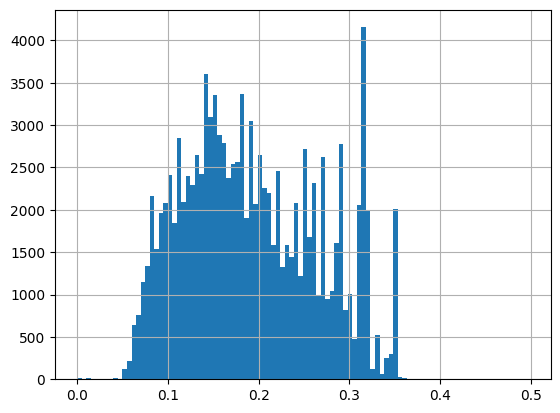

In [39]:
# histogram of Borrowerate.
data['BorrowerRate'].hist(bins=100)

<Axes: >

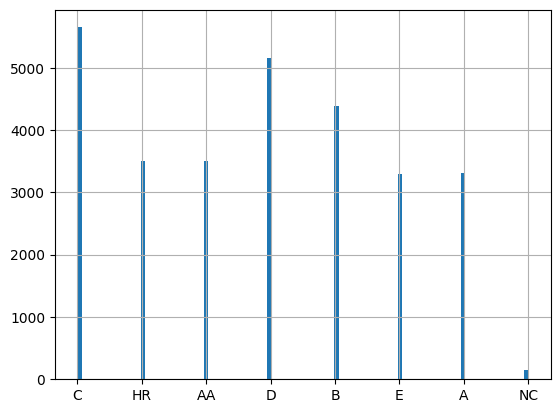

In [40]:
data['CreditGrade'].hist(bins=100)

<Axes: xlabel='count', ylabel='CreditGrade'>

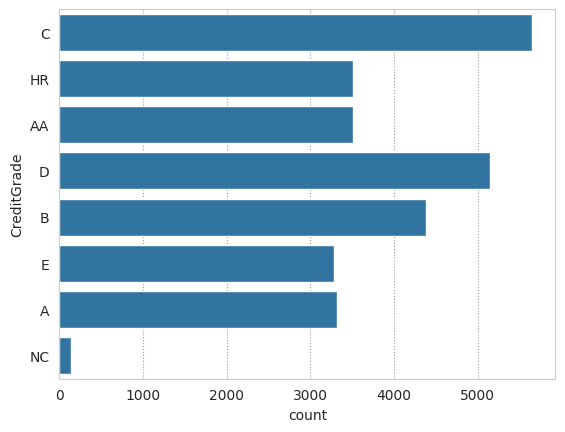

In [41]:
#Reading the histogram of the employeementStatus
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.countplot(y='CreditGrade',data=data)

##Univariate Analysis.

<Axes: >

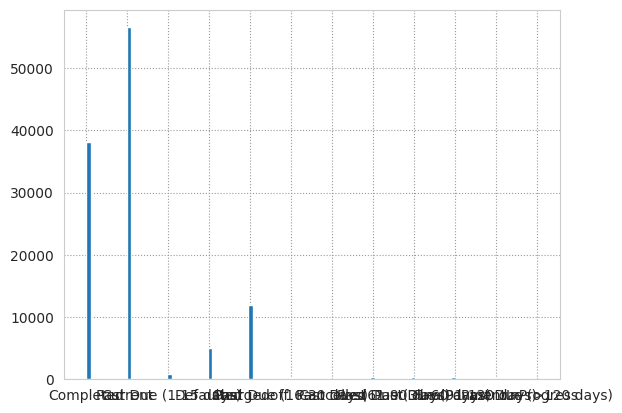

In [42]:
# Check the univariate relationship of Loan Status
# sns.set(rc={'figure.figsize':(28.7,5.27)})
# sns.set_style("whitegrid")
# sns.countplot(x='LoanStatus',data=df )
data['LoanStatus'].hist(bins=100)

<Axes: >

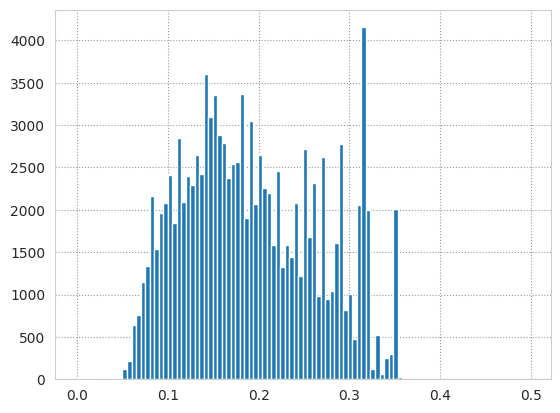

In [43]:
# Check the univariate relationship of Borrower rate
data['BorrowerRate'].hist(bins=100)

<Axes: >

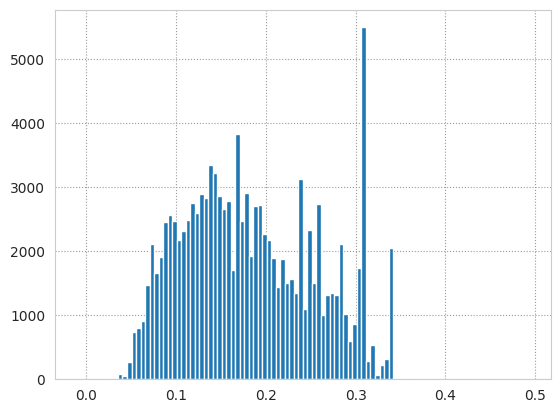

In [44]:
# Check the univariate relationship of Lender Yield on Loan
data['LenderYield'].hist(bins=100)

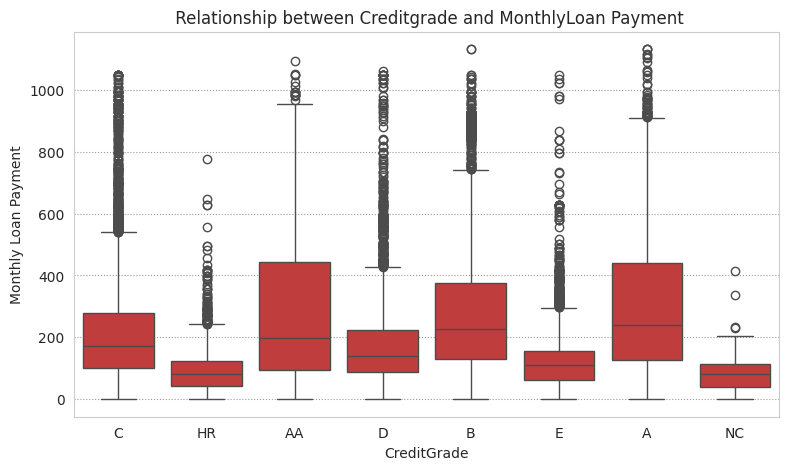

In [45]:
base_color = sns.color_palette()[3]
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 2)
sns.boxplot(data=data,x='CreditGrade',y='MonthlyLoanPayment',color=base_color);
plt.xlabel('CreditGrade');
plt.ylabel('Monthly Loan Payment');
plt.title(' Relationship between Creditgrade and MonthlyLoan Payment');

In [46]:
# # data = data.explode('LoanStatus')
# # data['LoanStatus'] = data['LoanStatus'].astype('float')
# # sns.violinplot(data=foo, x='CreditGrade', y='LoanStatus')
# sns.violinplot(x="CreditGrade", y="LoanStatus", data=data,palette='rainbow')

##Bivariate Analysis

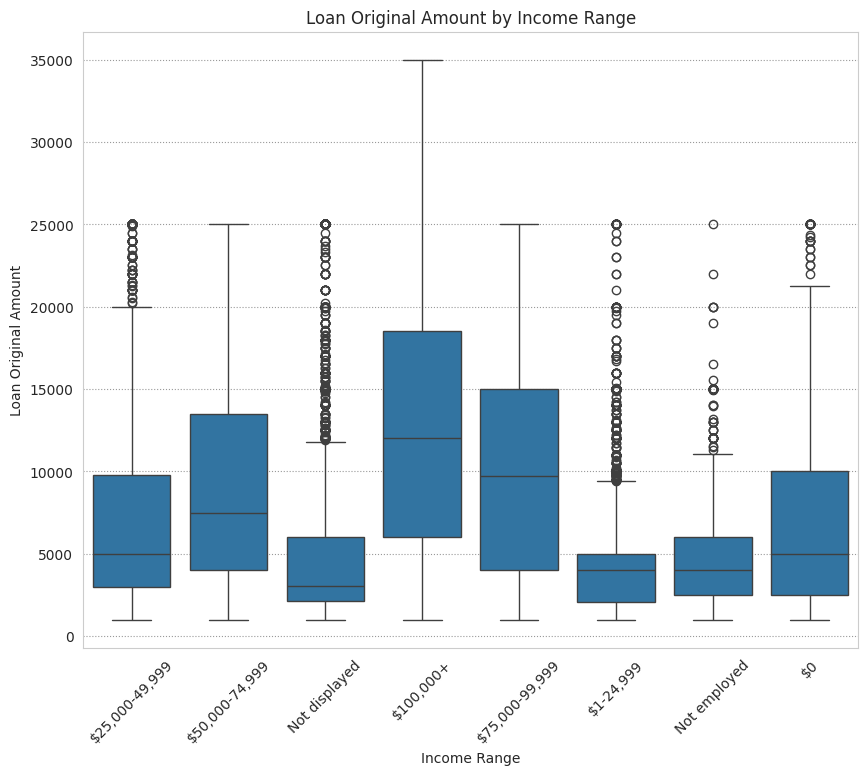

In [47]:
# Check the Bivariate Relatonship between CreditGrade and LoanStatus
 #CHECKING THE BIVARIATE USING SCATTERplots
 #Perform Bivariate Analysis
# Perform Bivariate Analysis
# Example: Scatter plot for 'BorrowerAPR' vs 'LoanOriginalAmount'
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x='IncomeRange', y='LoanOriginalAmount')
plt.title('Loan Original Amount by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Loan Original Amount')
plt.xticks(rotation=45)
plt.show()

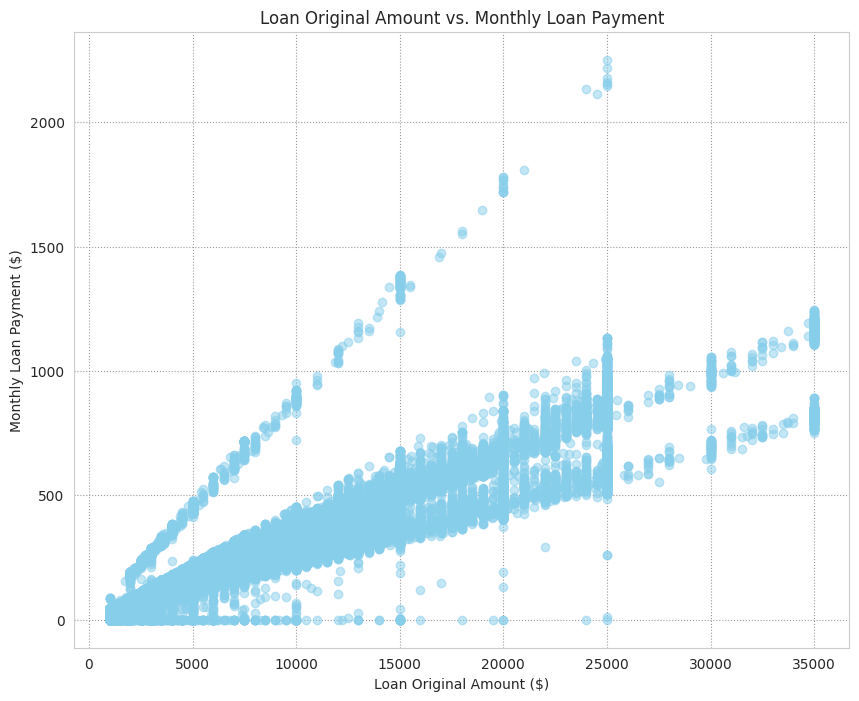

In [48]:
# Plotting scatter plot for LoanOriginalAmount vs. MonthlyLoanPayment
plt.figure(figsize=(10, 8))
plt.scatter(data['LoanOriginalAmount'], data['MonthlyLoanPayment'], alpha=0.5, color='skyblue')
plt.title('Loan Original Amount vs. Monthly Loan Payment')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Monthly Loan Payment ($)')
plt.grid(True)
plt.show()

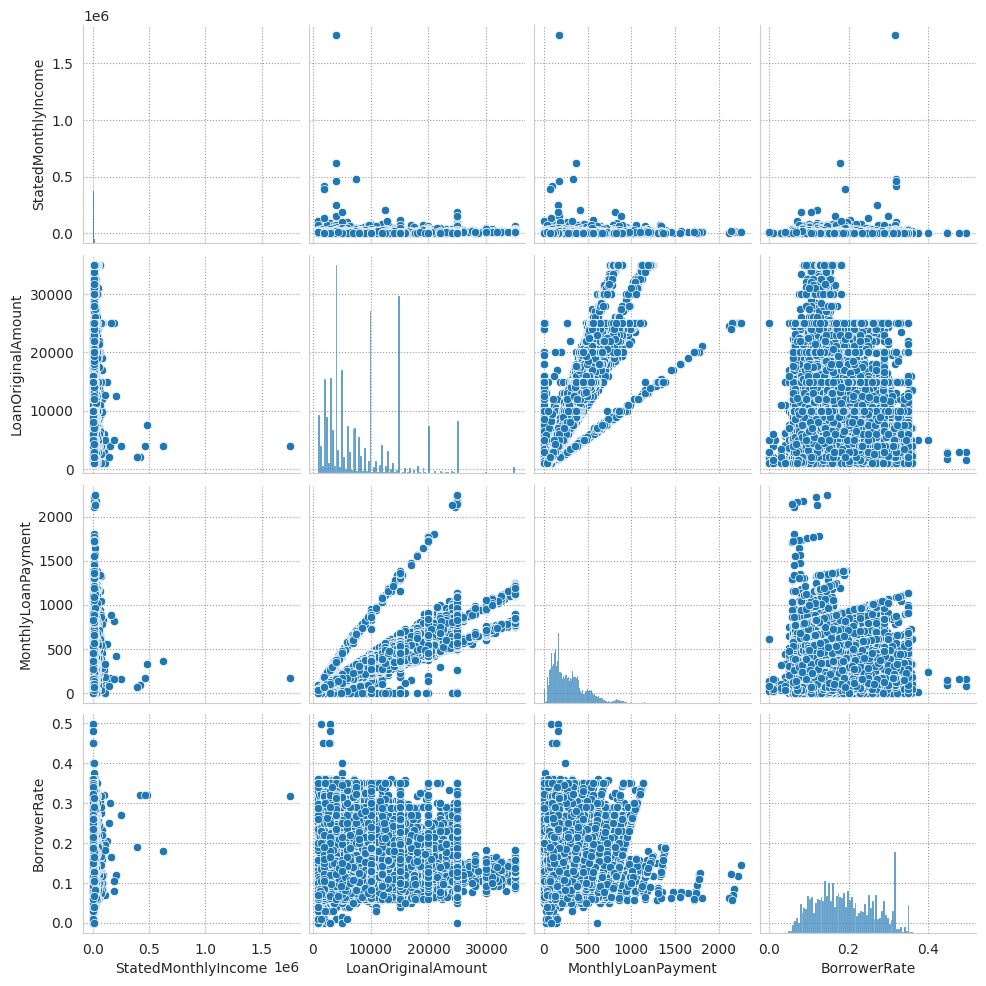

In [49]:
sns.pairplot(data[['StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'BorrowerRate']], diag_kind='hist', kind='scatter')
plt.show()

<Figure size 1200x800 with 0 Axes>

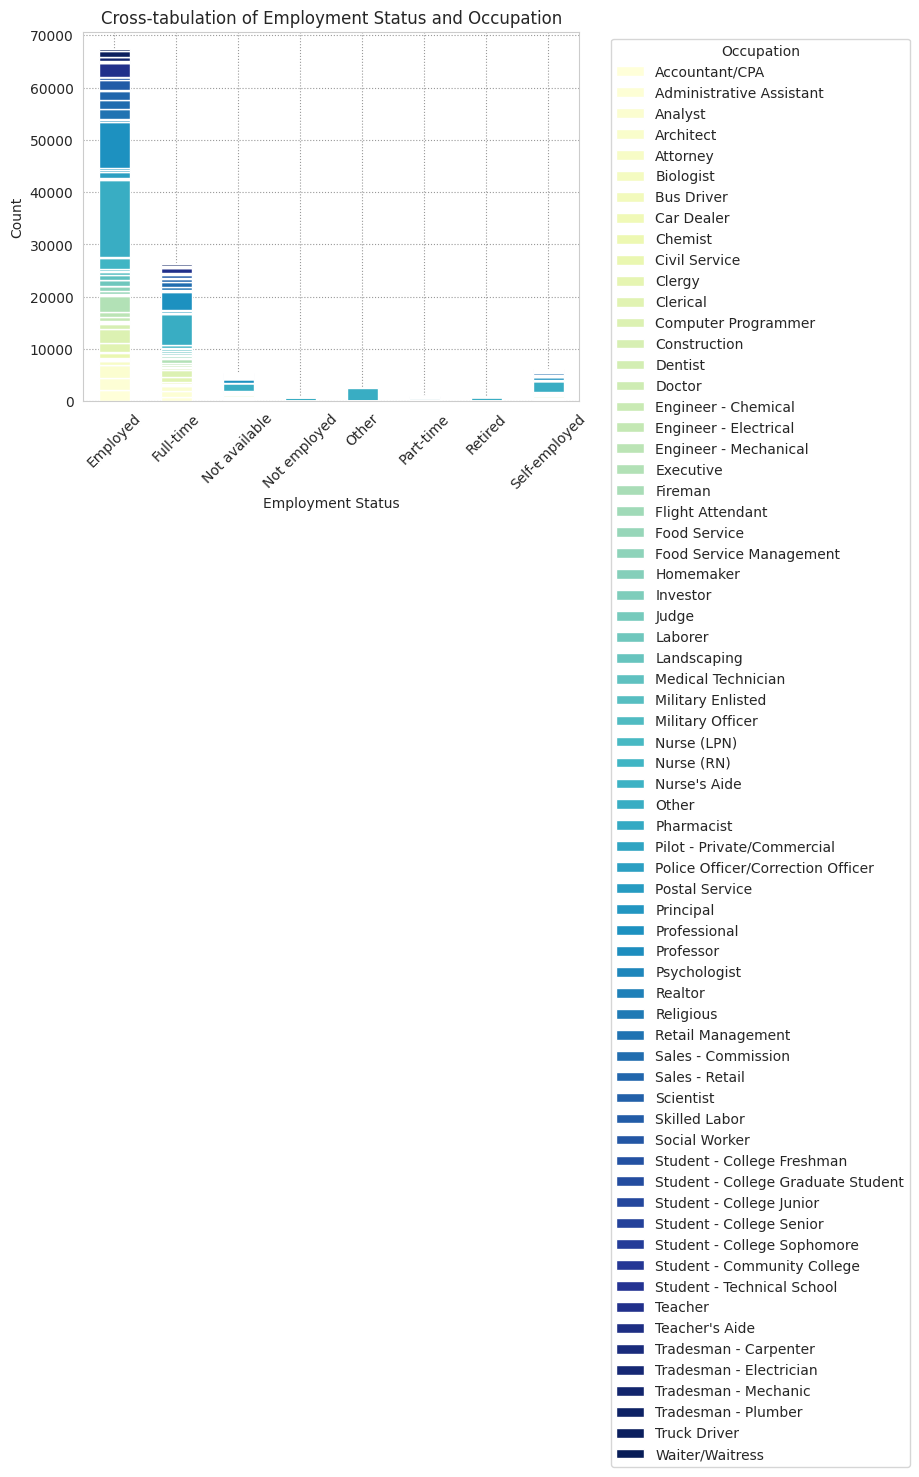

In [50]:
# Create a cross-tabulation of EmploymentStatus and Occupation
cross_tab = pd.crosstab(index=data['EmploymentStatus'], columns=data['Occupation'])
# Plotting clustered bar plot
plt.figure(figsize=(12, 8))
cross_tab.plot(kind='bar', stacked=True, cmap='YlGnBu')
plt.title('Cross-tabulation of Employment Status and Occupation')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [51]:
pd.crosstab(columns=[data.LoanStatus],index=[data.IsBorrowerHomeowner],margins=True,normalize='index')

# Grouping the data by 'EmploymentStatus' and calculating the mean 'EmploymentStatusDuration'
grouped_data = data.groupby('EmploymentStatus')['EmploymentStatusDuration'].mean().reset_index()

<ipython-input-52-f5130eb3a6b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='EmploymentStatus', y='EmploymentStatusDuration', palette='Set2')


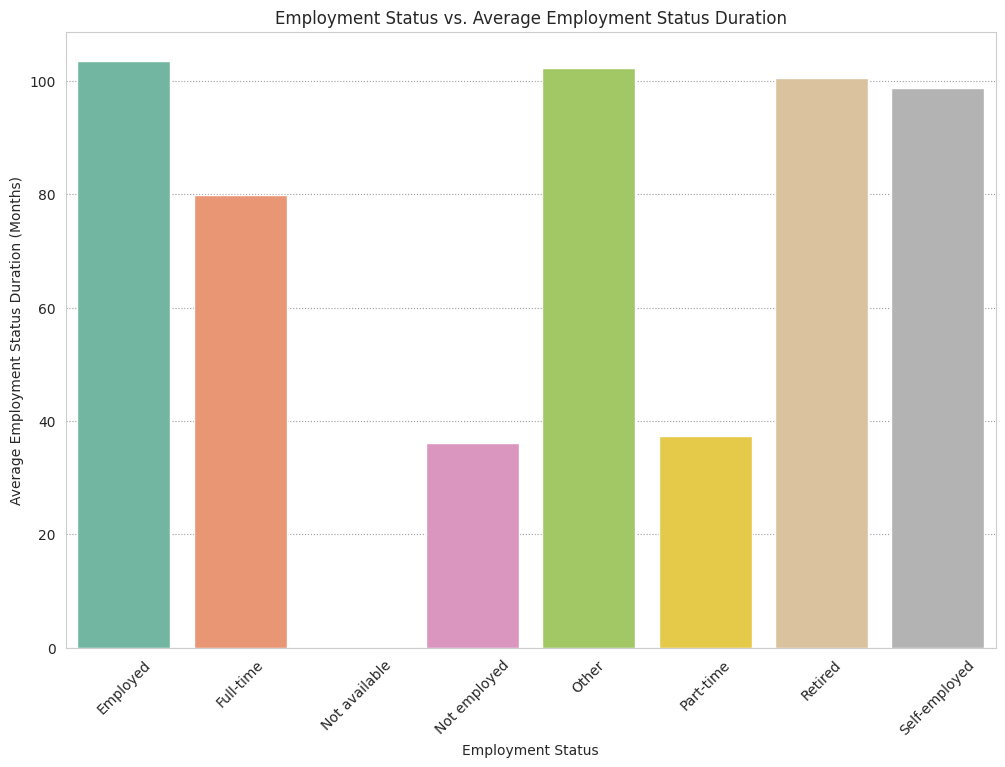

In [52]:
# Plotting grouped bar plot for EmploymentStatus vs. EmploymentStatusDuration
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='EmploymentStatus', y='EmploymentStatusDuration', palette='Set2')
plt.title('Employment Status vs. Average Employment Status Duration')
plt.xlabel('Employment Status')
plt.ylabel('Average Employment Status Duration (Months)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

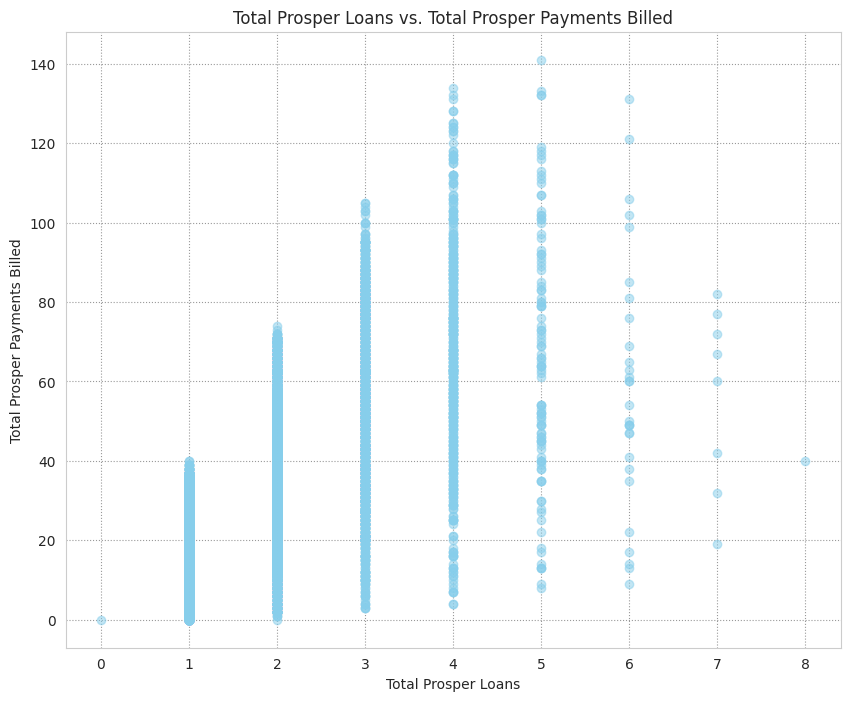

In [53]:
# Plotting scatter plot for TotalProsperLoans vs. TotalProsperPaymentsBilled
plt.figure(figsize=(10, 8))
plt.scatter(data['TotalProsperLoans'], data['TotalProsperPaymentsBilled'], alpha=0.5, color='skyblue')
plt.title('Total Prosper Loans vs. Total Prosper Payments Billed')
plt.xlabel('Total Prosper Loans')
plt.ylabel('Total Prosper Payments Billed')
plt.grid(True)
plt.show()

<ipython-input-54-42de07d0655f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='TotalProsperLoans', y='TotalProsperPaymentsBilled', palette='Blues')


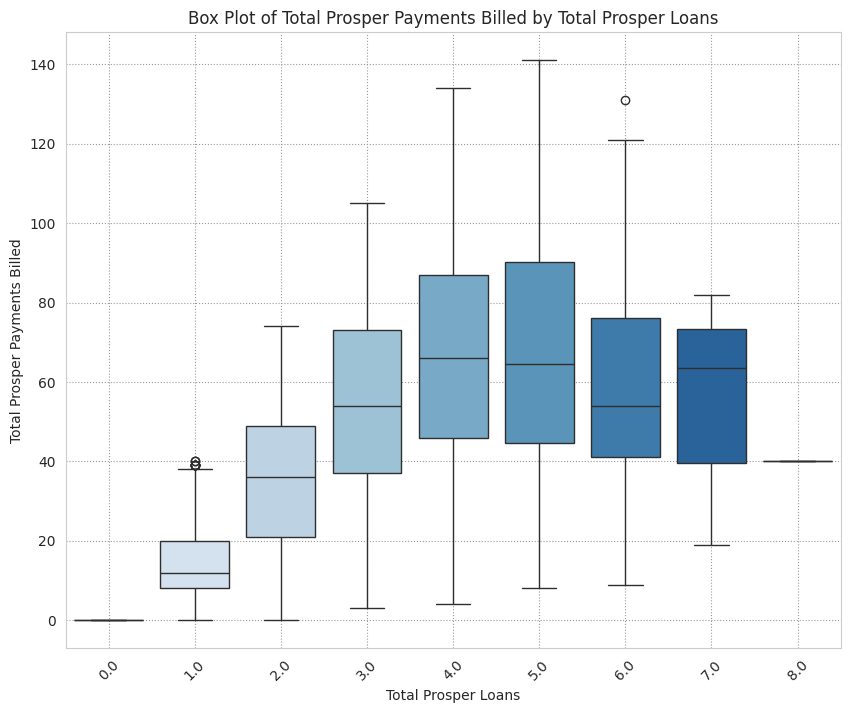

In [54]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x='TotalProsperLoans', y='TotalProsperPaymentsBilled', palette='Blues')
plt.title('Box Plot of Total Prosper Payments Billed by Total Prosper Loans')
plt.xlabel('Total Prosper Loans')
plt.ylabel('Total Prosper Payments Billed')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

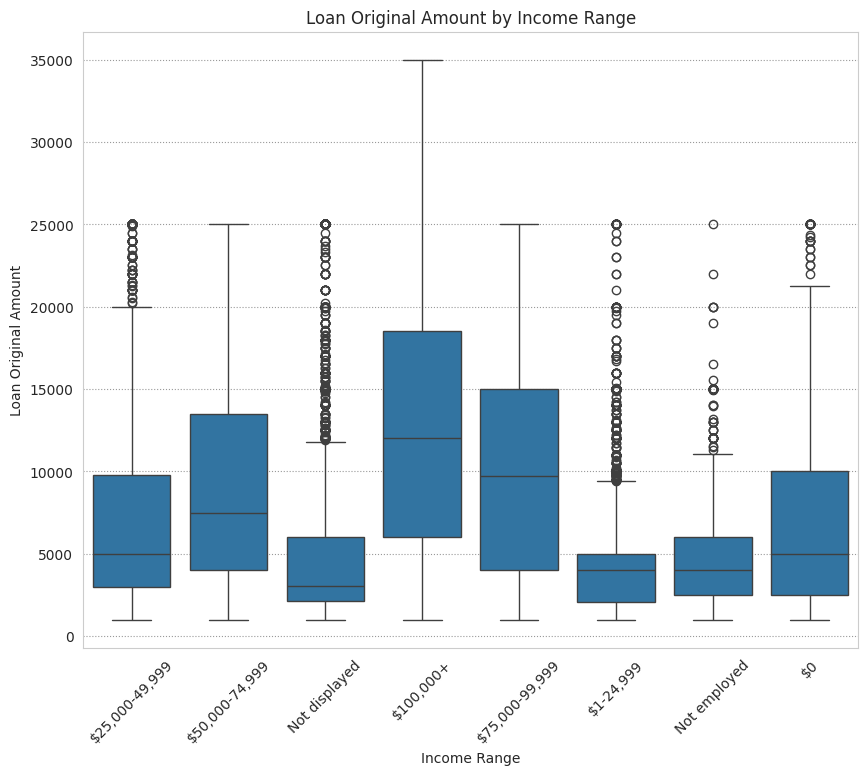

In [55]:
#Perform Bivariate Analysis
# Perform Bivariate Analysis
# Example: Scatter plot for 'BorrowerAPR' vs 'LoanOriginalAmount'
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x='IncomeRange', y='LoanOriginalAmount')
plt.title('Loan Original Amount by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Loan Original Amount')
plt.xticks(rotation=45)
plt.show()

##Multivariate Analysis

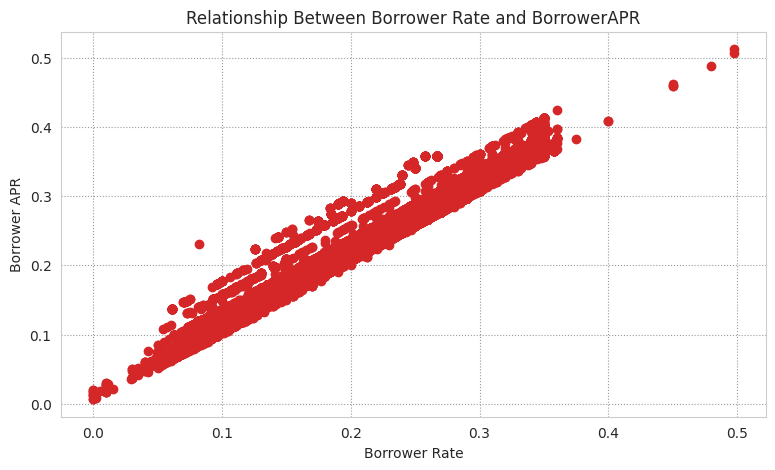

In [56]:
# Check the Multivariate Relationship between BorrowerRate and BorrowerAPR.

plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
plt.scatter(data=data,x='BorrowerRate',y='BorrowerAPR',color=base_color);
plt.xlabel('Borrower Rate');
plt.ylabel('Borrower APR');
plt.title('Relationship Between Borrower Rate and BorrowerAPR');

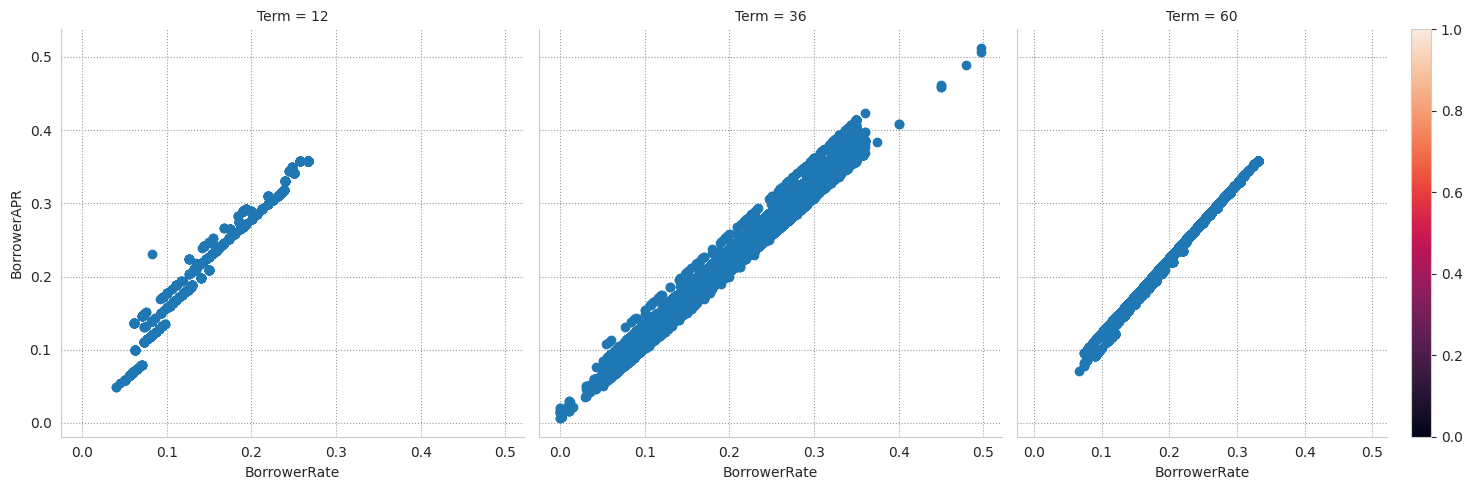

In [57]:
# Check the Multivariate Relationship between BorrowerRate and BorrowerAPR.
g = sb.FacetGrid(data = data, col = 'Term', height = 5,
                margin_titles = True)
g.map(plt.scatter, 'BorrowerRate', 'BorrowerAPR');
plt.colorbar()